<a href="https://colab.research.google.com/github/cmskzhan/helloworld/blob/master/concepts/python/public/scikit-linearegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [68]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_breast_cancer
from pandas_datareader import data as web
df = web.DataReader("MSCI", data_source='yahoo', start='01-01-2015')

In [69]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.939999,46.930000,47.689999,47.689999,477500.0,44.373196
2015-01-05,47.590000,46.799999,47.430000,47.240002,814100.0,43.954487
2015-01-06,49.549999,47.540001,47.599998,48.610001,1961000.0,45.229206
2015-01-07,49.790001,48.439999,48.880001,49.720001,1257700.0,46.262001
2015-01-08,51.270000,49.680000,50.060001,51.220001,1287600.0,47.657684
...,...,...,...,...,...,...
2021-02-24,417.549988,405.450012,411.869995,417.230011,480600.0,417.230011
2021-02-25,420.489990,400.500000,417.799988,406.299988,906400.0,406.299988
2021-02-26,420.579987,409.440002,410.829987,414.519989,662200.0,414.519989


In [70]:
df['pday_High'] = df['High'].shift(1)
df['pday_Low'] = df['Low'].shift(1)
df['pday_Volume'] = df['Volume'].shift(1)
df

,High,Low,Open,Close,Volume,Adj Close,pday_High,pday_Low,pday_Volume
Date,,,,,,,,,
2015-01-02,47.939999,46.930000,47.689999,47.689999,477500.0,44.373196,NaN,NaN,NaN
2015-01-05,47.590000,46.799999,47.430000,47.240002,814100.0,43.954487,47.939999,46.930000,477500.0
2015-01-06,49.549999,47.540001,47.599998,48.610001,1961000.0,45.229206,47.590000,46.799999,814100.0
2015-01-07,49.790001,48.439999,48.880001,49.720001,1257700.0,46.262001,49.549999,47.540001,1961000.0
2015-01-08,51.270000,49.680000,50.060001,51.220001,1287600.0,47.657684,49.790001,48.439999,1257700.0
...,...,...,...,...,...,...,...,...,...
2021-02-24,417.549988,405.450012,411.869995,417.230011,480600.0,417.230011,416.519989,404.670013,366100.0
2021-02-25,420.489990,400.500000,417.799988,406.299988,906400.0,406.299988,417.549988,405.450012,480600.0
2021-02-26,420.579987,409.440002,410.829987,414.519989,662200.0,414.519989,420.489990,400.500000,906400.0


In [71]:
X = df.drop(['Close', 'Adj Close', 'High', 'Low', 'Volume'], axis=1)
Y = df['Close']
X = X[1:]
Y = Y[1:]

In [72]:
X.columns

Index(['Open', 'pday_High', 'pday_Low', 'pday_Volume'], dtype='object')

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1 )

In [74]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression(normalize = True).fit(x_train, y_train)
print("Linear Regression Model Traininig Score:", l_model.score(x_train, y_train))

Linear Regression Model Traininig Score: 0.9985132103944168


In [75]:
predicators = x_train.columns
weights = pd.Series(l_model.coef_, predicators)
weights

Open           9.432359e-01
pday_High      7.617916e-02
pday_Low      -2.226182e-02
pday_Volume    1.780527e-07
dtype: float64

In [76]:
y_predicate = l_model.predict(x_test)

In [77]:
pred_vs_actual = pd.DataFrame({'predicted': y_predicate, 'actual': y_test})
pred_vs_actual.head(20)

,predicted,actual
Date,,
2018-04-04,148.291610,146.699997
2020-12-23,434.382830,428.630005
2016-09-07,88.728784,89.059998
2017-03-28,96.720509,96.610001
2016-02-02,67.232027,66.790001
2017-03-29,96.557378,96.400002
2016-11-08,80.870742,81.080002
2016-12-20,80.295062,80.739998
2015-03-24,60.348834,59.779999


In [78]:
from sklearn.metrics import r2_score
print("R2 score for linear regression test is: ", r2_score(y_predicate, y_test))

R2 score for linear regression test is:  0.998971312685139


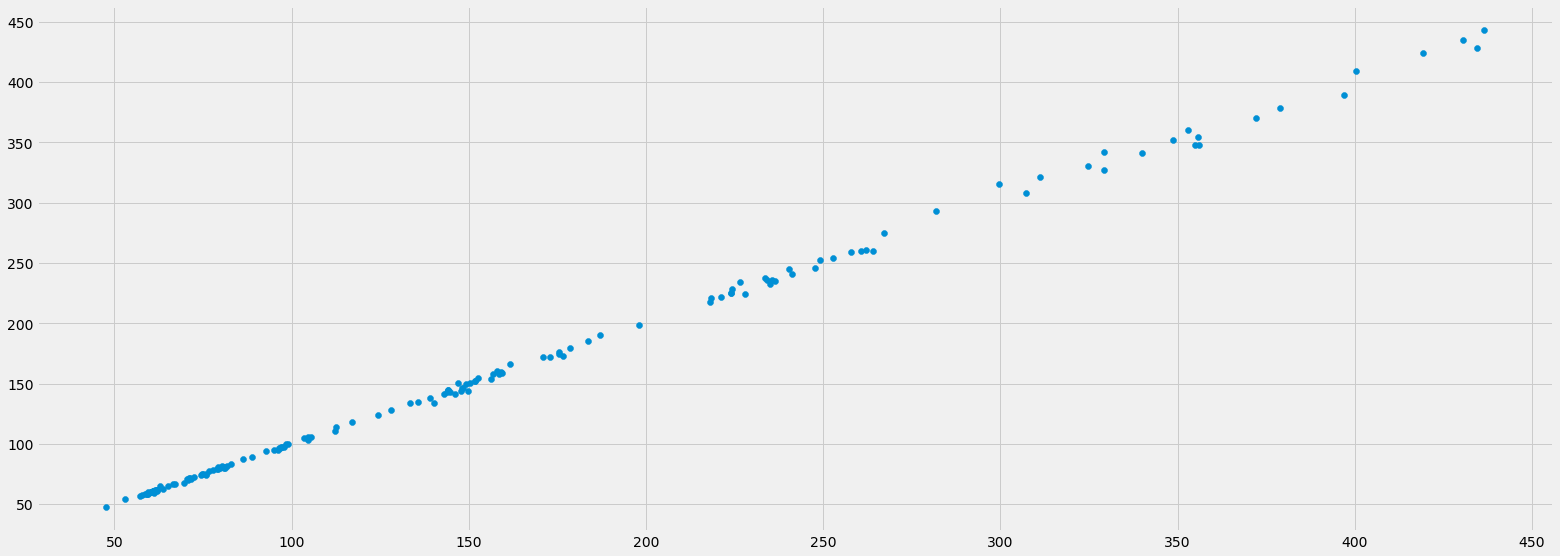

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
#plt.scatter(df.index, df['TS_buy'], color = 'green', label = 'TS buy', marker = '^', alpha = 1)
#plt.scatter(df.index, df['TS_sell'], color = 'red', label = 'TS sell', marker = 'v', alpha = 1)
plt.scatter(y_predicate, y_test)
plt.show()

In [80]:
# to compare predicted and actual
pred_vs_actual.sort_index()

,predicted,actual
Date,,
2015-01-05,47.673063,47.240002
2015-01-13,52.887156,54.049999
2015-02-24,57.909569,57.650002
2015-03-13,57.337224,56.740002
2015-03-18,58.515571,58.700001
...,...,...
2020-11-30,400.231836,409.420013
2020-12-14,419.291397,423.899994
2020-12-18,436.483607,443.059998


In [81]:
show_diff = pred_vs_actual.sort_index().reset_index(drop=True)
show_diff

,predicted,actual
0,47.673063,47.240002
1,52.887156,54.049999
2,57.909569,57.650002
3,57.337224,56.740002
4,58.515571,58.700001
...,...,...
150,400.231836,409.420013
151,419.291397,423.899994
152,436.483607,443.059998
153,434.382830,428.630005


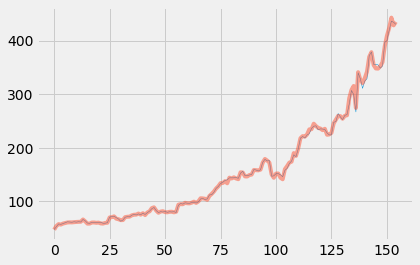

In [142]:
plt.plot(show_diff['predicted'], label='predicted', linewidth=0.5 )
plt.plot(show_diff['actual'], label='actual', alpha=0.5)
plt.show()

In [83]:
type(l_model)

sklearn.linear_model._base.LinearRegression

In [84]:
#save the model so don't need to train again and again...
# reference from https://scikit-learn.org/stable/modules/model_persistence.html
import pickle
linear_regression_model_MSCI_closePrice = pickle.dumps(l_model)
#to save model to a file use joblib

In [85]:
saved_model = pickle.loads(linear_regression_model_MSCI_closePrice)

In [101]:
type(X.loc['2021-01-06'])
x_test

,Open,pday_High,pday_Low,pday_Volume
Date,,,,
2018-04-04,144.250000,146.850006,142.830002,22350100.0
2020-12-23,435.000000,438.420013,431.450012,216400.0
2016-09-07,88.339996,90.190002,87.639999,1351700.0
2017-03-28,96.610001,97.239998,96.029999,458000.0
2016-02-02,66.940002,68.379997,67.269997,770300.0
...,...,...,...,...
2020-10-13,353.290009,355.859985,350.230011,254200.0
2015-01-13,52.700001,52.490002,51.759998,500800.0
2016-05-19,74.919998,75.570000,73.930000,621700.0


In [136]:
XX = 430.59, 440.09, 426.45, 319400
anotherTest = web.DataReader("MSCI", data_source='yahoo', start='2021-03-01')
anotherTest['pday_High'] = anotherTest['High'].shift(1)
anotherTest['pday_Low'] = anotherTest['Low'].shift(1)
anotherTest['pday_Volume'] = anotherTest['Volume'].shift(1)
anotherTest.drop(['Close', 'Adj Close', 'High', 'Low', 'Volume'], axis=1, inplace=True)
anotherTest.dropna(axis=0, inplace=True)
anotherTest

,Open,pday_High,pday_Low,pday_Volume
Date,,,,
2021-03-02,420.0,422.380005,413.029999,342900.0
2021-03-03,420.0,429.559998,410.380005,726200.0


In [134]:
saved_model.predict(anotherTest)

array([420.11917135])

In [135]:
web.DataReader("MSCI", data_source='yahoo', start='2021-03-01')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-01,422.380005,413.029999,418.089996,420.029999,342900,420.029999
2021-03-02,429.559998,410.380005,420.000000,418.809998,726200,418.809998
2021-03-03,422.589996,413.359985,420.000000,415.815002,80603,415.815002


In [137]:
manualInput = {'Open': [420], 'pday_High': [422.38], 'pday_Low': [413.03], 'pday_Volume': [342900.0] }
anotherTest2 = pd.DataFrame(manualInput)
anotherTest2

,Open,pday_High,pday_Low,pday_Volume
0,420,422.38,413.03,342900.0


In [138]:
saved_model.predict(anotherTest2)

array([419.44496388])